# Linear Regression



## The problem

Linear regression assumes that the predictor function is:

$$\hat{y} = \mathbf{w}^\top \cdot \phi(\mathbf{x}) $$

With the basis function $\phi$ equal to the identity function: 

$$\hat{y} = \mathbf{w}^\top \cdot \mathbf{x} $$

defined by parameters $\mathbf{w}$.

Given the data $D = \{(\mathbf{x_i}, y_i)\}_{i=1}^m$, we can compute the performance of an hypothesis with the Mean Square Error:

$$MSE_D = \frac{1}{m} \sum_i (\hat{y} - y)  $$

## Closed-form solution

$$\min MSE_D \implies \nabla_{\mathbf{w}} MSE_D = 0$$

$$ \implies $$

$$ \mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1}  \mathbf{X}^T \mathbf{y} $$


## Probabilistic interpretation (conditional log-likelihood maximization)

If we put the problem if linear regression in term of maximum likelihood estimation, that is, assuming the data are distributed as:

- $p(y | x) = \mathcal{N}(y; \hat{y}(\mathbf{w},\mathbf{x}), \sigma^2)$

We have that:

- MSE minimization $\equiv$ log-likelihood maximization

Indeed:
$$
\begin{align}
\mathbf{w}_{ML} &= \arg\max_\mathbf{w} p(Y | \mathbf{X}; \mathbf{w}) \\
&= \arg\max_\mathbf{w} \prod_i p(y_i | \mathbf{x_i}; \mathbf{w}) \\
&= \arg\max_\mathbf{w} \sum_i\log p(y_i | \mathbf{x_i}; \mathbf{w}) \\
&= \arg\max_\mathbf{w} - ... - ... - \sum_i \frac{||\hat{y}_i - y_i||^2}{2\sigma^2}
\end{align}
$$

## Bayesian LR

Adding a prior over the parameters and doing MAP estimation is equivalent to common regularization technique (e.g. Lasso/Ridge regression), when the prior is distributed as Gaussian or Laplacian, respectively.

## Linear Regression and The CEF

The CEF $E(Y|X)$ represents the relationship between $X$ and $Y$ by taking the mean of the conditional probability distribution $Y|X=x$ for all $x.$ This idea is illustrated in the figure below:

## Univariate Linear Regression

[Gradient Descent based](#Gradient-Descent-based)  
[Closed form](#Closed-form)  
[Using Sklearn](#Using-sklearn)  

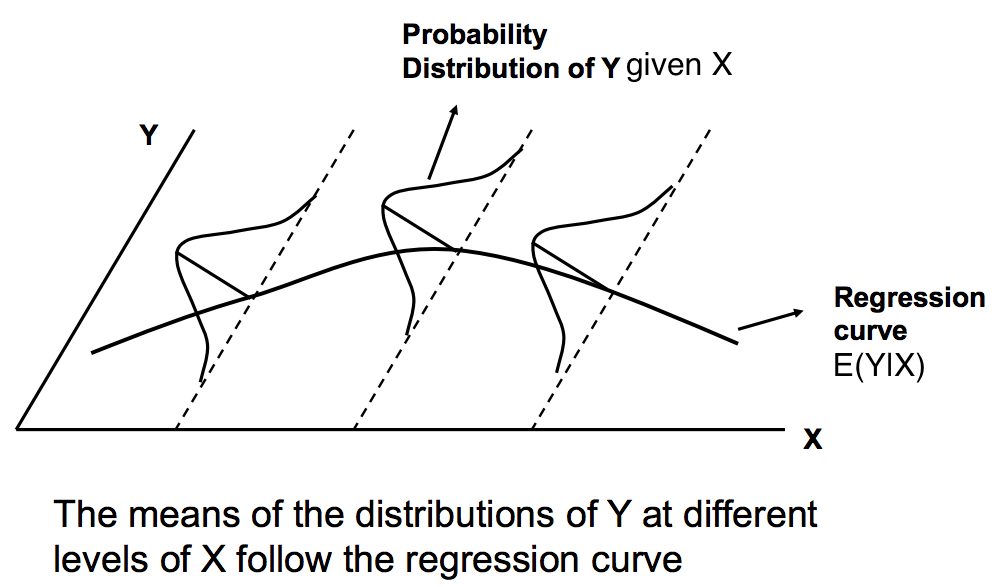

In [1]:
from IPython.display import Image 
pil_img = Image(filename='2.png')
display(pil_img)

The outcome variable $Y$ can be decomposed as follows: $$Y = E(Y|X) + \epsilon,$$ where $\epsilon$ is a stochastic error term. 

The linear regression is essentially a parametrization of the CEF. That is we assume for example $E(Y|X) = \beta_{0} + \beta_{1}X,$ plugging this into the above decomposition results in the standard linear regression $Y = \beta_{0} + \beta_{1}X + \epsilon.$ In otherwords we can think about the linear regression as an approximation to the CEF.

## Estimating Linear Regression Parameters

The parameters in the linear regression can be estimated by minimizing the following objective function: $$\min_{\beta_{0}, \beta_{1}}\sum_{i=1}^{n}(Y_{i} - \beta_{0} - \beta_{1}X_{i})^2 \implies \hat{\beta_{1}} = \frac{s_{xy}}{s_{x}s_{y}}, \hat{\beta_{0}} = \bar{Y} - \hat{\beta_{1}}\bar{X}.$$
This is know as square loss (or L2 loss) function and is motivated by the definition of the conditional mean as discussed above. 


Suppose we have multiple regressors $x_{1}, \ldots, x_{k}$ then using matrices, we can re-write the assumed true linear relationship between $y_{i}$ and $x_{i}$ as

$$\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{n}
\end{bmatrix} 
=
\begin{bmatrix}
    1 & x_{11} & \ldots & x_{k1}\\
    \vdots & \vdots & \ldots & \vdots \\
    1 & x_{12} & \ldots & x_{k2}\\
    1 & x_{1n} & \ldots & x_{kn}
\end{bmatrix} 
\begin{bmatrix}
    \beta_{0} \\
    \beta_{1} \\
    \vdots \\
    \beta_{k}
\end{bmatrix} 
+
\begin{bmatrix}
    \epsilon_{1} \\
    \epsilon_{2} \\
    \vdots \\
    \epsilon_{n}
\end{bmatrix}.
$$
Using outcome vector $y$, coeffecient vector $\beta$, error vector $\epsilon$, and covariate matrix $X$ (also known as design matrix), we can re-write the above equation as $y = X\beta + \epsilon.$ For the standard square loss function, the closed form solution for the parameters is $\hat{\beta} = (X'X)^{-1}X'y,$

### Gradient Descent based
 

(20, 2) (20, 1)


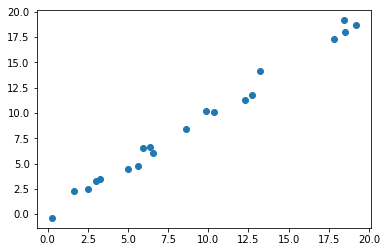

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def generate_linear_data(w, N):
    """generate data"""
    x = np.random.uniform(low=0, high=20, size=(N, 1))
    # one column of ones for the bias
    x = np.hstack([np.ones((N, 1)), x])
    # linear data with uniform error
    y = x.dot(w) + (2 * np.random.random(N) -1)
    y = y.reshape((N, 1))
    return x, y


x, y = generate_linear_data(np.array([0, 1]), 20)
print(x.shape, y.shape)
plt.scatter(x[:, 1], y)
plt.show()

In [3]:
# our hypothesis
def hypothesis(w):
    """In this case, our hypothesis is a line"""
    return lambda x: x.dot(w)


def cost(w, x, y):
    # Mean squared error
    N = len(x)
    h = hypothesis(w)
    hx = h(x).reshape(y.shape)
    # print(x.shape, y.shape)
    # print("h(x)", h(x).shape)
    # print("np.square(h(x)-y)", (h_x -y).shape)
    # print(np.sum(np.square(h(x)-y)))
    return 1/(2*N) * np.sum(np.square(hx-y))


def cost_derivative(w, x, y):
    N = len(x)
    h = hypothesis(w)
    hx = h(x).reshape(y.shape)
    s = (hx-y)*x
    # print(hx.shape)
    # print(s.shape)
    return 1/N * np.sum(s, axis=0)

In [4]:
# find parameters that minimize the cost function: Gradient Descent


def gradient_descent(x, y, alpha=0.01, num_steps=1000):
    """Given data, return two parameters, a and b, for the best fit"""
    w = np.random.random(2)
    
    for i in range(num_steps):
        c = cost(w, x, y)
        new_w = w - alpha * cost_derivative(w, x, y)
        if i % 1000 == 0: 
            print("Iteration:\t", i, "\tcost:\t", c, "\tweights:\t", w)
        w = new_w
    return w

In [5]:
w = gradient_descent(x,y, alpha=0.01, num_steps=10000)
print("Final weights:", w)

Iteration:	 0 	cost:	 35.4853701003202 	weights:	 [0.34663164 0.18260219]
Iteration:	 1000 	cost:	 0.16418959105036107 	weights:	 [-0.01697571  0.98774108]
Iteration:	 2000 	cost:	 0.16411069414476226 	weights:	 [-0.03883738  0.98943947]
Iteration:	 3000 	cost:	 0.1641104840020508 	weights:	 [-0.03996565  0.98952712]
Iteration:	 4000 	cost:	 0.16411048344233348 	weights:	 [-0.04002388  0.98953165]
Iteration:	 5000 	cost:	 0.1641104834408426 	weights:	 [-0.04002688  0.98953188]
Iteration:	 6000 	cost:	 0.16411048344083853 	weights:	 [-0.04002704  0.98953189]
Iteration:	 7000 	cost:	 0.1641104834408387 	weights:	 [-0.04002704  0.98953189]
Iteration:	 8000 	cost:	 0.16411048344083878 	weights:	 [-0.04002704  0.98953189]
Iteration:	 9000 	cost:	 0.16411048344083856 	weights:	 [-0.04002704  0.98953189]
Final weights: [-0.04002704  0.98953189]


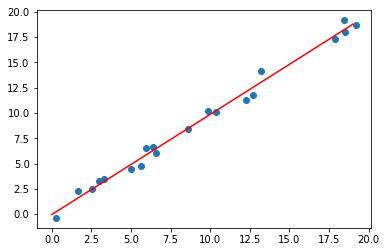

In [6]:
x_arr = np.arange(20).reshape((20, 1))
x_arr = np.hstack([np.ones((20, 1)), x_arr])
y_arr = hypothesis(w)(x_arr)

plt.scatter(x[:, 1], y)
plt.plot(x_arr[:, 1], y_arr, c="r")
plt.show()

### Closed-form

Closed-form weights: [-0.04002704  0.98953189]


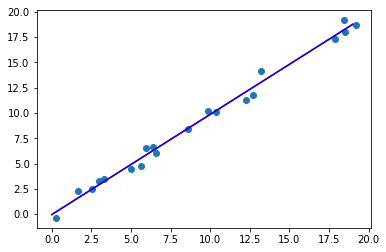

In [7]:
w_closed_form = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y).reshape(w.size)
print("Closed-form weights:", w_closed_form)
y_closed_form = hypothesis(w_closed_form)(x_arr)

plt.scatter(x[:, 1], y)
plt.plot(x_arr[:, 1], y_arr, c="r")
plt.plot(x_arr[:, 1], y_closed_form, c="b")
plt.show()

### Using Sklearn

[[0.         0.98953189]]


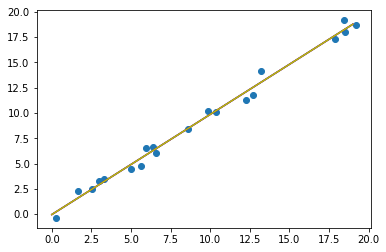

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)
y_sklearn = model.predict(x_arr)
print(model.coef_)
plt.scatter(x[:, 1], y)
plt.plot(x_arr[:, 1], y_arr, c="r")
plt.plot(x_arr[:, 1], y_closed_form, c="b")
plt.plot(x_arr[:, 1], y_sklearn, c="y")
plt.show()

## References

- [Chapter 5 of deeplearningbook.org](http://www.deeplearningbook.org/contents/ml.html)